# Introduction

In this project, I will act as a data visualization developer at Yahoo Finance! I will be helping the "Netflix Stock Profile" team visualize the Netflix stock data. In finance, a _stock profile_ is a series of studies, visualizations, and analyses that dive into different aspects a publicly traded company's data. 

For the purposes of the project, I will only visualize data for the year of 2017. Specifically, I will be in charge of creating the following visualizations:
+ The distribution of the stock prices for the past year
+ Netflix's earnings and revenue in the last four quarters
+ A comparison of the Netflix Stock price vs the Dow Jones Industrial Average price in 2017 

Note: I am using the Dow Jones Industrial Average to compare the Netflix stock to the larter stock market. Learn more about why the Dow Jones Industrial Average is a general reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp).

Financial Data Source: [Yahoo Finance](https://finance.yahoo.com/quote/DATA/)


In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Step 2

Now, I will load the datasets and inspect them.

In [3]:
netflix_stocks = pd.read_csv('NFLX.csv')
print(netflix_stocks)

          Date        Open        High         Low       Close   Adj Close  \
0   2017-01-01  124.959999  143.460007  124.309998  140.710007  140.710007   
1   2017-02-01  141.199997  145.949997  139.050003  142.130005  142.130005   
2   2017-03-01  142.839996  148.289993  138.259995  147.809998  147.809998   
3   2017-04-01  146.699997  153.520004  138.660004  152.199997  152.199997   
4   2017-05-01  151.910004  164.750000  151.610001  163.070007  163.070007   
5   2017-06-01  163.520004  166.869995  147.300003  149.410004  149.410004   
6   2017-07-01  149.800003  191.500000  144.250000  181.660004  181.660004   
7   2017-08-01  182.490005  184.619995  164.229996  174.710007  174.710007   
8   2017-09-01  175.550003  189.949997  172.440002  181.350006  181.350006   
9   2017-10-01  182.110001  204.380005  176.580002  196.429993  196.429993   
10  2017-11-01  197.240005  202.479996  184.320007  195.509995  195.509995   
11  2017-12-01  186.990005  194.490005  178.380005  191.960007  

Loading **DJI.csv** into a DataFrame called `dowjones_stocks`. Then, quickly inspecting the DataFrame using `print()`.

In [4]:
dowjones_stocks = pd.read_csv('DJI.csv')
print(dowjones_stocks)

          Date          Open          High           Low         Close  \
0   2017-01-01  19872.859375  20125.580078  19677.939453  19864.089844   
1   2017-02-01  19923.810547  20851.330078  19831.089844  20812.240234   
2   2017-03-01  20957.289063  21169.109375  20412.800781  20663.220703   
3   2017-04-01  20665.169922  21070.900391  20379.550781  20940.509766   
4   2017-05-01  20962.730469  21112.320313  20553.449219  21008.650391   
5   2017-06-01  21030.550781  21535.029297  20994.220703  21349.630859   
6   2017-07-01  21392.300781  21929.800781  21279.300781  21891.119141   
7   2017-08-01  21961.419922  22179.109375  21600.339844  21948.099609   
8   2017-09-01  21981.769531  22419.509766  21709.630859  22405.089844   
9   2017-10-01  22423.470703  23485.250000  22416.000000  23377.240234   
10  2017-11-01  23442.900391  24327.820313  23242.750000  24272.349609   
11  2017-12-01  24305.400391  24876.070313  23921.900391  24719.220703   

       Adj Close      Volume  
0   19

Load **NFLX_daily_by_quarter.csv** into a DataFrame called `netflix_stocks_quarterly`. Then, quickly inspect the DataFrame using `print()`.


In [5]:
netflix_stocks_quarterly = pd.read_csv('NFLX_daily_by_quarter.csv')
print(netflix_stocks_quarterly)

           Date        Open        High         Low       Close   Adj Close  \
0    2017-01-03  124.959999  128.190002  124.309998  127.489998  127.489998   
1    2017-01-04  127.489998  130.169998  126.550003  129.410004  129.410004   
2    2017-01-05  129.220001  132.750000  128.899994  131.809998  131.809998   
3    2017-01-06  132.080002  133.880005  129.809998  131.070007  131.070007   
4    2017-01-09  131.479996  131.990005  129.889999  130.949997  130.949997   
..          ...         ...         ...         ...         ...         ...   
246  2017-12-22  188.330002  190.949997  186.800003  189.940002  189.940002   
247  2017-12-26  189.779999  189.940002  186.399994  187.759995  187.759995   
248  2017-12-27  187.800003  188.100006  185.220001  186.240005  186.240005   
249  2017-12-28  187.179993  194.490005  186.850006  192.710007  192.710007   
250  2017-12-29  192.509995  193.949997  191.220001  191.960007  191.960007   

       Volume Quarter  
0     9437900      Q1  
1  

## Step 3

In [6]:
print(netflix_stocks.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2017-01-01  124.959999  143.460007  124.309998  140.710007  140.710007   
1  2017-02-01  141.199997  145.949997  139.050003  142.130005  142.130005   
2  2017-03-01  142.839996  148.289993  138.259995  147.809998  147.809998   
3  2017-04-01  146.699997  153.520004  138.660004  152.199997  152.199997   
4  2017-05-01  151.910004  164.750000  151.610001  163.070007  163.070007   

      Volume  
0  181772200  
1   91432000  
2  110692700  
3  149769200  
4  116795800  


In [7]:
netflix_stocks.rename(columns={"Adj Close": "Price"}, inplace=True)
dowjones_stocks.rename(columns={"Adj Close": "Price"}, inplace=True)
netflix_stocks_quarterly.rename(columns={"Adj Close": "Price"}, inplace=True)

Running `netflix_stocks.head()` again to check your column name has changed.

In [8]:
print(netflix_stocks.head())

         Date        Open        High         Low       Close       Price  \
0  2017-01-01  124.959999  143.460007  124.309998  140.710007  140.710007   
1  2017-02-01  141.199997  145.949997  139.050003  142.130005  142.130005   
2  2017-03-01  142.839996  148.289993  138.259995  147.809998  147.809998   
3  2017-04-01  146.699997  153.520004  138.660004  152.199997  152.199997   
4  2017-05-01  151.910004  164.750000  151.610001  163.070007  163.070007   

      Volume  
0  181772200  
1   91432000  
2  110692700  
3  149769200  
4  116795800  


Calling `.head()` on the DataFrame `dowjones_stocks` and `netflix_stocks_quarterly`.

In [9]:
print(dowjones_stocks.head())
print(netflix_stocks_quarterly.head())

         Date          Open          High           Low         Close  \
0  2017-01-01  19872.859375  20125.580078  19677.939453  19864.089844   
1  2017-02-01  19923.810547  20851.330078  19831.089844  20812.240234   
2  2017-03-01  20957.289063  21169.109375  20412.800781  20663.220703   
3  2017-04-01  20665.169922  21070.900391  20379.550781  20940.509766   
4  2017-05-01  20962.730469  21112.320313  20553.449219  21008.650391   

          Price      Volume  
0  19864.089844  6482450000  
1  20812.240234  6185580000  
2  20663.220703  6941970000  
3  20940.509766  5392630000  
4  21008.650391  6613570000  
         Date        Open        High         Low       Close       Price  \
0  2017-01-03  124.959999  128.190002  124.309998  127.489998  127.489998   
1  2017-01-04  127.489998  130.169998  126.550003  129.410004  129.410004   
2  2017-01-05  129.220001  132.750000  128.899994  131.809998  131.809998   
3  2017-01-06  132.080002  133.880005  129.809998  131.070007  131.070007

## Step 4

I will be visualizing the Netflix quarterly data using a violin plot with four violins, one for each business quarter!


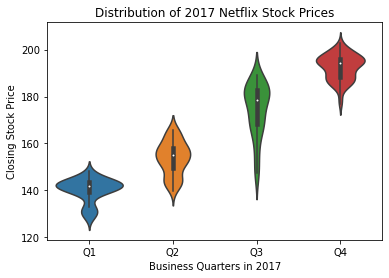

In [10]:
ax = sns.violinplot(data=netflix_stocks_quarterly, x ='Quarter', y='Price')
ax.set_title("Distribution of 2017 Netflix Stock Prices")
ax.set(xlabel='Business Quarters in 2017', ylabel='Closing Stock Price')
plt.show()

## Step 5

Next, I will chart the performance of the earnings per share (EPS) by graphing the estimate Yahoo projected for the Quarter compared to the actual earnings for that quarters. I will accomplish this using a scatter chart. 


Text(0.5, 1.0, 'Earnings Per Share in Cents')

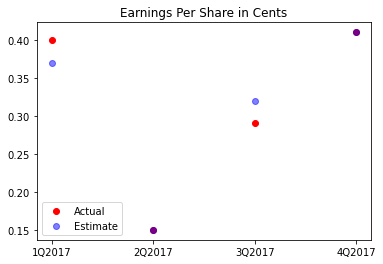

In [11]:
x_positions = [1, 2, 3, 4]
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]
earnings_actual =[.4, .15,.29,.41]
earnings_estimate = [.37,.15,.32,.41 ]

plt.scatter(x_positions, earnings_actual, color='red')
plt.scatter(x_positions, earnings_estimate, color='blue', alpha=0.5)
plt.legend(["Actual", "Estimate"])
plt.xticks(x_positions, chart_labels)
plt.title("Earnings Per Share in Cents")


## Step 6

In this last step, we will compare Netflix stock to the Dow Jones Industrial Average in 2017. We will accomplish this by plotting two line charts side by side in one figure. 


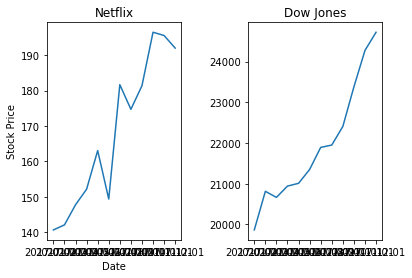

In [13]:
# Left plot Netflix
ax1 = plt.subplot(1,2,1)
plt.plot(netflix_stocks['Date'], netflix_stocks['Price'])
ax1.set_title("Netflix")
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price")

# Right plot Dow Jones
ax2 = plt.subplot(1,2,2)
plt.plot(dowjones_stocks['Date'], dowjones_stocks['Price'])
ax2.set_title("Dow Jones")
plt.subplots_adjust(wspace=.5)
plt.show()



